# Seaborn

### Imports

In [1]:
import seaborn as sns
import pandas as pd

## Seaborn and Matplotlib

\#1. Seaborn updates `matplotlib`'s rc parameters to improve aesthetics

In [2]:
import matplotlib.pyplot as plt

In [2]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

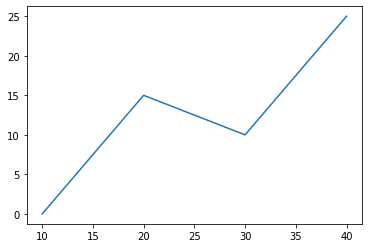

In [3]:
plt.plot(x, y)

In [4]:
# set seaborn
sns.set() 

We can see that now the figure is dramatically better. 

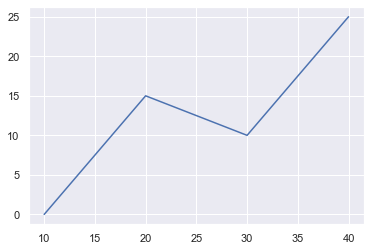

In [5]:
plt.plot(x, y)

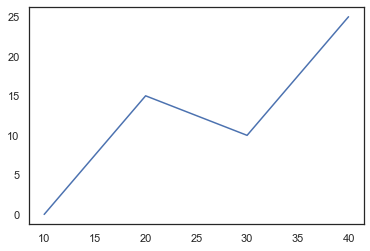

In [7]:
# we can set differents styles
sns.set_style("white")
plt.plot(x, y)

### Checking the version

In [8]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [9]:
sns.__version__

'0.11.2'

## Seaborn with `pandas`

\#2. Let Seaborn group, aggregate, and plot your `pandas` dataframes

In [11]:
#Importing data
cars = sns.load_dataset('mpg')
type(cars)

pandas.core.frame.DataFrame

In [12]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
cars.dropna(inplace=True)

cars.shape

(392, 9)

**relplot** provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 
The relationship between `x` and `y`can be shown for different subsets of the data using the `hue`, `size`, and `style` parameters.
For example:
- `hue` (vector or key in `data`)
Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
- `row`, `col` (vectors or keys in `data`) Variables that define subsets to plot on different facets.

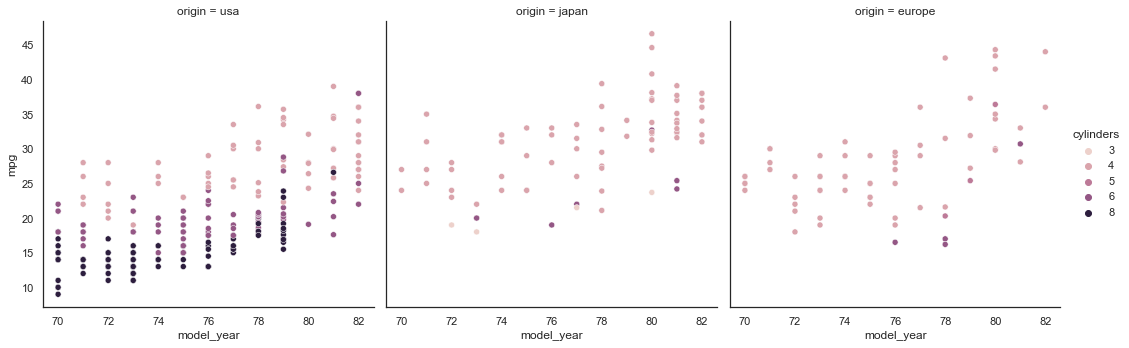

In [15]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders', 
            data=cars)

## Seaborn: KDEplot

A `kernel density estimate` (`KDE`) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Relative to a histogram, `KDE` can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.

In [16]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
cars.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

### Univariate (1D)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

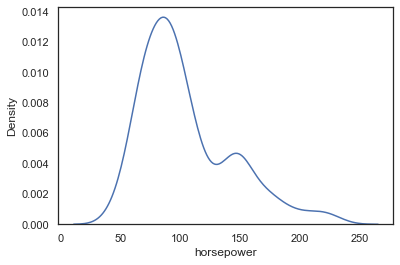

In [42]:
sns.kdeplot(cars.horsepower)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

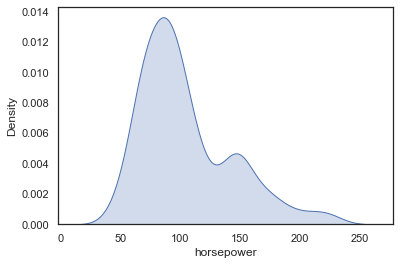

In [43]:
sns.kdeplot(cars.horsepower, shade=True)

`bw_method` it's a method for determining the smoothing bandwidth to use. 
`bw_adjust` Factor that multiplicatively scales the value chosen using bw_method. Increasing will make the curve smoother. By default is 1. The closer to zero is this value, more irregular peaks will be seen, and that is really just increase the variance. On the other hand, if you increase this value too much, you'll start to see that curve smooth out and, in fact, you will even possibly lose out on the modes in your data set, especually if you have more than one peak.


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

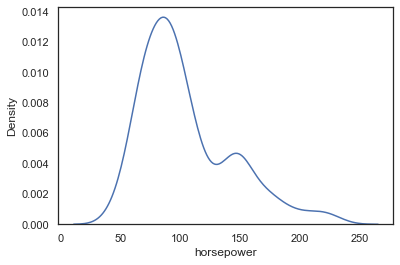

In [44]:
sns.kdeplot(cars.horsepower, bw_adjust=1)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

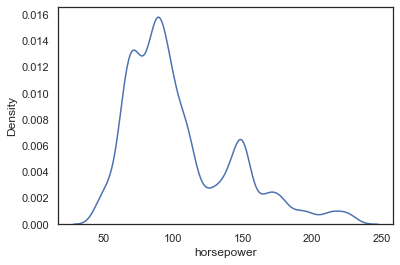

In [45]:
sns.kdeplot(cars.horsepower, bw_adjust=0.5)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

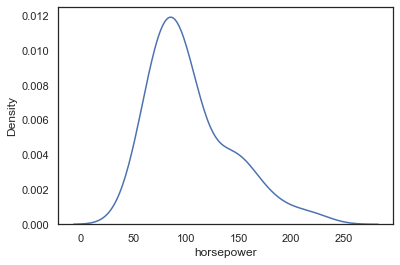

In [46]:
sns.kdeplot(cars.horsepower, bw_adjust=1.5)

Let's see the cumulative curve. 

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

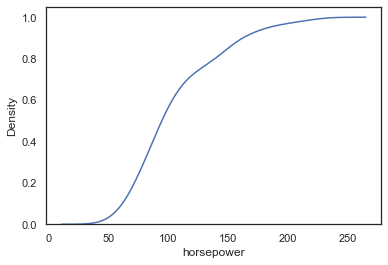

In [47]:
sns.kdeplot(cars.horsepower, cumulative=True)


### Bivariate (2D)

#### Bivariate Intro
In this case we want to estimate the joint probability density function for the data below in two dimensions (x and y). `Seabonrn's KDE plot` allows you to create contours representing various different density levels of your data so that you can estimate that joint.


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

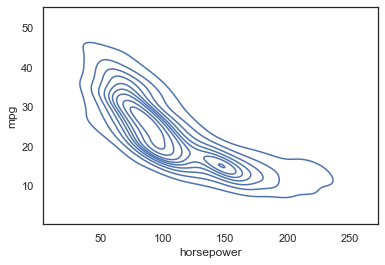

In [49]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg)


Let's see the scatterplot

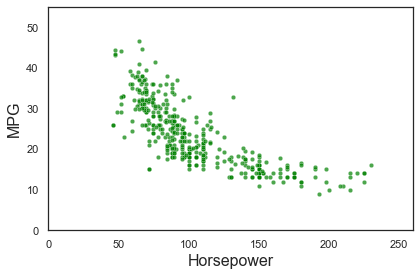

In [56]:
sns.scatterplot(x=cars.horsepower, y=cars.mpg, color='green', alpha=0.7, s=20)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=16)
plt.ylabel('MPG', fontsize=16)
plt.tight_layout()

Now join the scatterplot and kdeplot

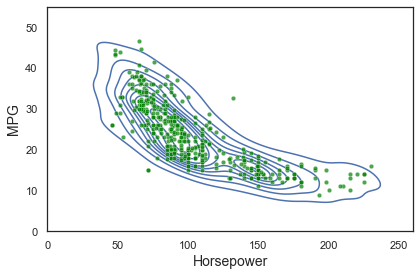

In [57]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg)
sns.scatterplot(x=cars.horsepower, y=cars.mpg, color='green', alpha=0.7, s=20, zorder=10)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout()

There's a couple different options you can take advantage of here as well, perhaps you'd like to have more rings or more diferents levels, you can change that value by accessing the parameter `levels` or `fill` if you want to fill the area.
- `levels` Number of contour levels or values to draw contours at. A vector argument must have increasing values in [0, 1]. Levels correspond to iso-proportions of the density: e.g., 20% of the probability mass will lie below the contour drawn for 0.2. Only relevant with bivariate data.
- `fill` If True, fill in the area under univariate density curves or between bivariate contours. If None, the default depends on multiple.


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

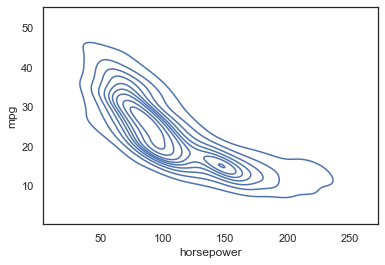

In [59]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg )


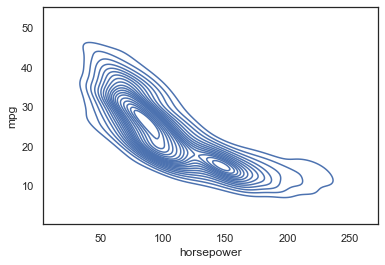

In [62]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, levels=20);


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

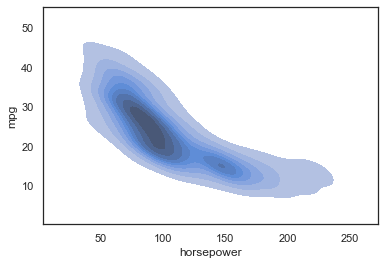

In [63]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, fill=True)


Using a diferent colormap

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

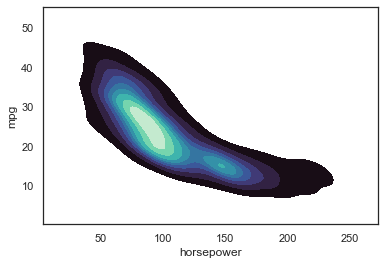

In [64]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, fill=True, cmap="mako")

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

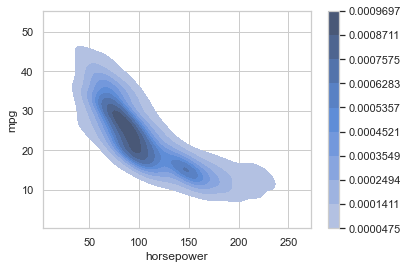

In [71]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, 
            shade=True, 
            thresh=0.05,
            cbar=True
           )

### Bivariate KDEplot by Category

We have two diferent categories in the data, so we can plot both and see that 4 cylinder and 8 cylinder cars have really diferent density patterns in Miles per Gallon.

Text(190, 18, '8 Cylinders')

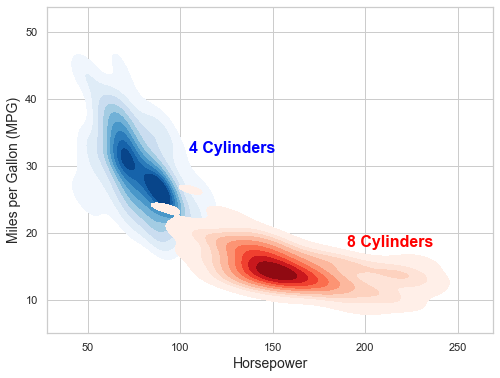

In [73]:
cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
            cmap="Blues", shade=True)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
            cmap="Reds", shade=True)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color="blue", fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color="red", fontsize=16, fontweight='bold')

## Seaborn: histplot

Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate

### Importing Data

In [74]:
penguins = sns.load_dataset('penguins')

In [76]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [77]:
penguins.shape

(344, 7)

In [78]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [79]:
penguins.dropna(inplace=True)
penguins.shape

(333, 7)

### Visuals

In [93]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

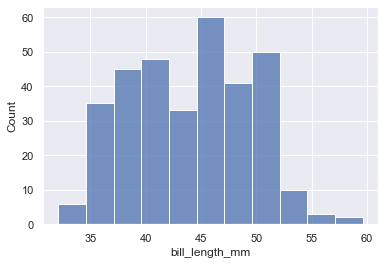

In [95]:
sns.histplot(penguins.bill_length_mm )

There's also an alternative way to do the sintax:

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

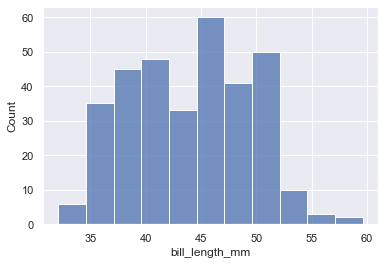

In [96]:
sns.histplot(x = 'bill_length_mm', data=penguins)


We also can add the KDE argument

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

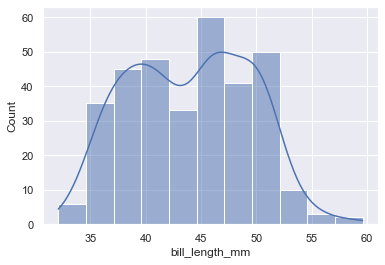

In [97]:
sns.histplot(x = 'bill_length_mm', data=penguins,
             kde=True)

Hisplot also have an argument called `bins`: Generic bin parameter that can be the name of a reference rule, the number of bins, or the breaks of the bins.
For example, if we add *bins=20* what this will do is create 20 separate bins equally spaced across our range.

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

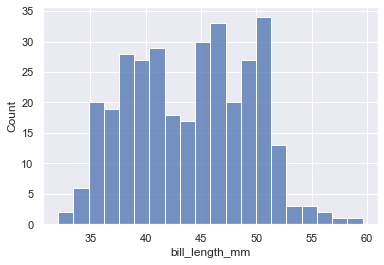

In [98]:
sns.histplot(x = 'bill_length_mm', data=penguins,
                bins=20)

If you have a specific location that you'd like those bins to appear you can pass in a list with the start and stop locations 

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

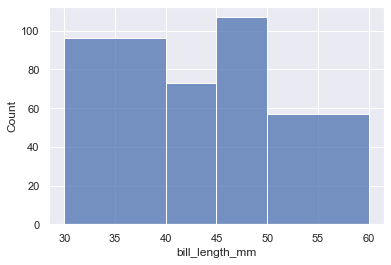

In [99]:
sns.histplot(x='bill_length_mm', data=penguins,
             bins=[30, 40, 45, 50, 60]
             )

`binwidth` is another argument used to assign a specific width to the bins, and also apply it in a specific range with `binrange`.

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

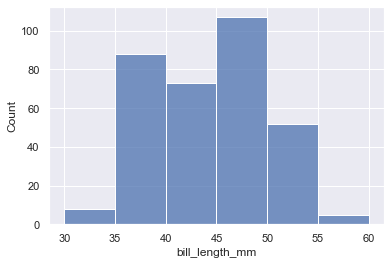

In [100]:
sns.histplot(x='bill_length_mm', data=penguins, 
             binwidth=5, binrange=(30, 60)
            ) 

### Statistics


The histplot also comes with the `stat` argument, an aggregate statistic to compute in each bin.

- `count`: show the number of observations in each bin
- `frequency`: show the number of observations divided by the bin width
- `probability`: or proportion: normalize such that bar heights sum to 1
- `percent`: normalize such that bar heights sum to 100
- `density`: normalize such that the total area of the histogram equals 1

`count`

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

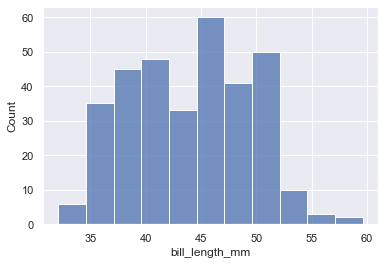

In [101]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='count'
            )

`density` - AREA of histogram sums to one

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

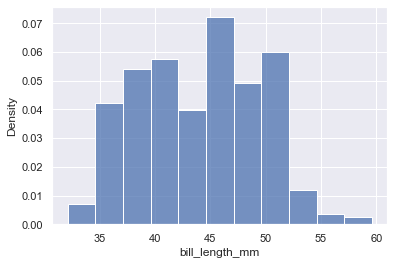

In [102]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='density')

`frequency` show the number of observations divided by the bin width

<AxesSubplot:xlabel='bill_length_mm', ylabel='Frequency'>

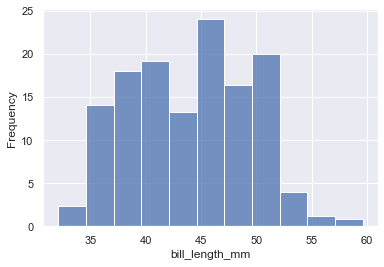

In [103]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='frequency')

`probability` - HEIGHT of histogram bars to one

<AxesSubplot:xlabel='bill_length_mm', ylabel='Probability'>

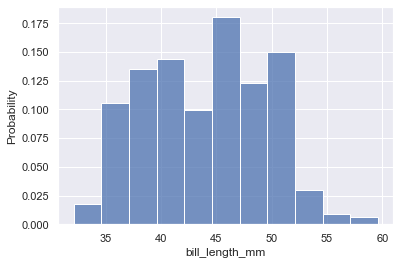

In [104]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability')

`cumulative` If True, plot the cumulative counts as bins increase.

<AxesSubplot:xlabel='bill_length_mm', ylabel='Probability'>

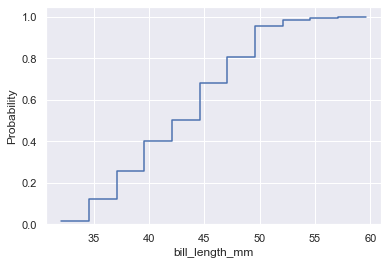

In [105]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability', fill=False, element='step',
             cumulative=True
            )

### Categorical Variables

`hue` Semantic variable that is mapped to determine the color of plot elements.

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

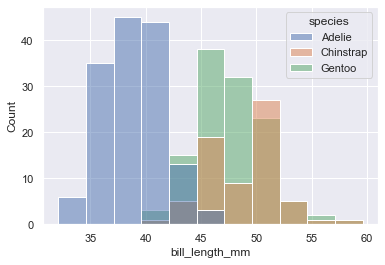

In [106]:
sns.histplot(x='bill_length_mm', data=penguins, hue='species')

`element` Visual representation of the histogram statistic. Only relevant with univariate data.

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

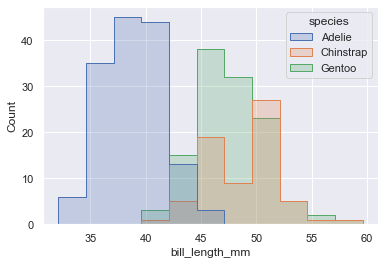

In [107]:
sns.histplot(x='bill_length_mm', data=penguins, 
             hue='species',
             element='step'
            )

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

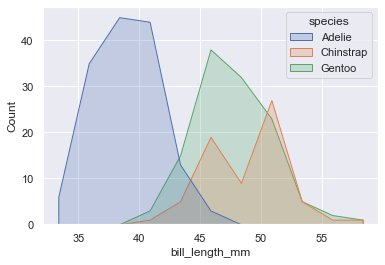

In [108]:
sns.histplot(x='bill_length_mm', data=penguins, 
             hue='species',
             element='poly'
            )

`multiple`  Approach to resolving multiple elements when semantic mapping creates subsets. Only relevant with univariate data. Values could be {“layer”, “dodge”, “stack”, “fill”}


`stack` seaborn count up which species (or data) appear in each bucket and stacking them on top of each other

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

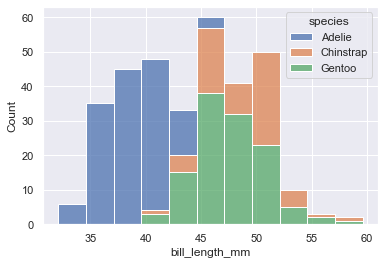

In [109]:
sns.histplot(x='bill_length_mm', data=penguins, 
             hue='species', 
             multiple='stack'
            )

`fill` showing the proportion of each species (or data) in each bucket

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

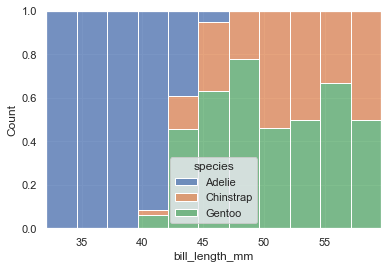

In [110]:
sns.histplot(x='bill_length_mm', data=penguins, 
             hue='species', 
             multiple='fill'
            )

### Bivariate Histplot

In the following plot we have the bill_length on the x-axis and the bill_depth in the y-axis. In the middle we've basically switched over to a heat map. 

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

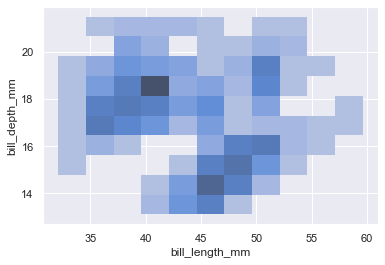

In [111]:
sns.histplot(x='bill_length_mm', y='bill_depth_mm', data=penguins)


a disadvantage is that we no longer have a scale on the y-axis because we're displaying two different variables. If we like to know what this colors represent we can add in a color bar setting cbar=True.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

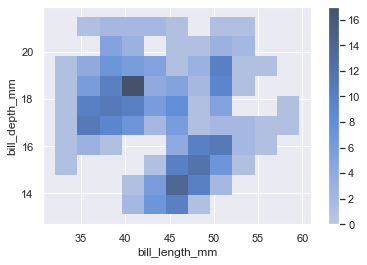

In [112]:
sns.histplot(x='bill_length_mm', y='bill_depth_mm', 
                data=penguins, cbar=True)


`hue`

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

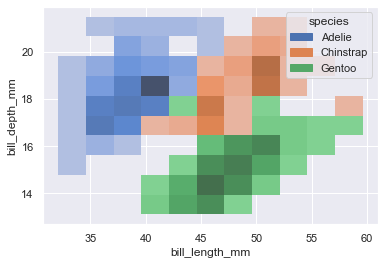

In [113]:
sns.histplot(x='bill_length_mm', y='bill_depth_mm', 
                data=penguins, hue='species')

### Discrete color map

Switch our `y` variable to `species` 

<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

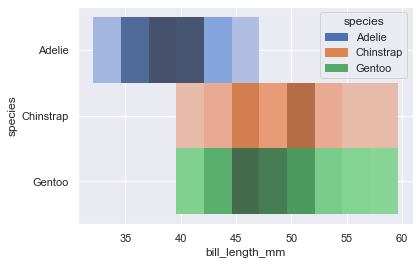

In [115]:
sns.histplot(x='bill_length_mm', y='species', data=penguins,
             hue='species'
            )

### Styling 

`shrink`
Scale the width of each bar relative to the binwidth by this factor. Only relevant with univariate data.

<AxesSubplot:xlabel='species', ylabel='Count'>

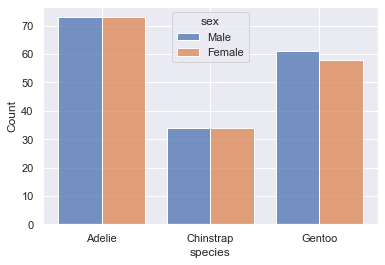

In [114]:
sns.histplot(x='species',  hue='sex', multiple='dodge', data=penguins,
             shrink=0.8)

`color`: Single color specification for when hue mapping is not used. Otherwise, the plot will try to hook into the matplotlib property cycle.

`palette`: Method for choosing the colors to use when mapping the hue semantic.

Possible palette values include:
- Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
- Name of matplotlib colormap
- ‘husl’ or ‘hls’
- ‘ch:<cubehelix arguments>’
- ‘light:<color>’, ‘dark:<color>’, ‘blend:<color>,<color>’,
- A sequence of colors in any format matplotlib accepts

`color`

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

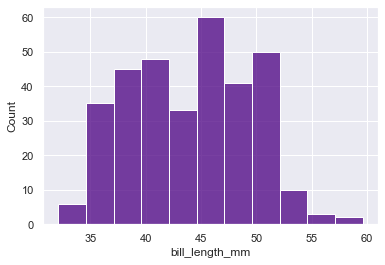

In [116]:
sns.histplot(x='bill_length_mm', data=penguins,
             color='indigo'
            )

`palette`

<AxesSubplot:xlabel='species', ylabel='Count'>

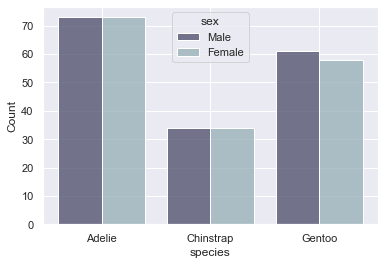

In [117]:
sns.histplot(x='species',  hue='sex', multiple='dodge', data=penguins,
             shrink=0.8, palette='bone'
            )

`fill`

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

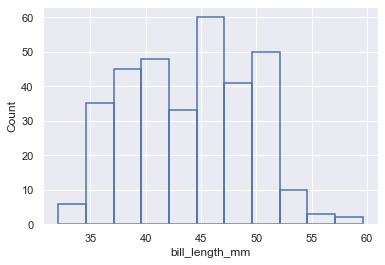

In [118]:
sns.histplot(x='bill_length_mm', data=penguins,
            fill=False
            )

### Other `kwargs`

Other keyword arguments can also be used, but allowed keywords depend on the type of histplot you are making:

- Univariate, element="bars": [matplotlib.axes.Axes.bar()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar)

- Univariate, other element, fill=True: [matplotlib.axes.Axes.fill_between()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between)

- Univariate, other element, fill=False: [matplotlib.axes.Axes.plot()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)

- Bivariate: [matplotlib.axes.Axes.pcolormesh()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html#matplotlib.axes.Axes.pcolormesh) 

## Seaborn: boxplot

`seaborn.boxplot` Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

### Importig data

In [5]:
cars = sns.load_dataset('mpg').dropna()
cars.dropna(inplace=True)
cars.shape

(392, 9)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [6]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
sns.set_style('whitegrid')

In [9]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

Filter down to only cars with even number of cylinders

In [10]:
cars = cars[cars.cylinders.isin([4,6,8])]

<AxesSubplot:xlabel='mpg'>

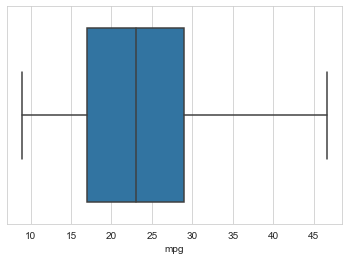

In [12]:
sns.boxplot(x=cars.mpg)

In [13]:
cars.mpg.describe()

# we can see that the summary statistics coincide with the boxplot
# there are no outliers


count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Using categories to separate the data.
We need one value for x and a different value for y.

In this case the data will be group by the `origin` of where were made, and it will perform for miles per galon (y-axis)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

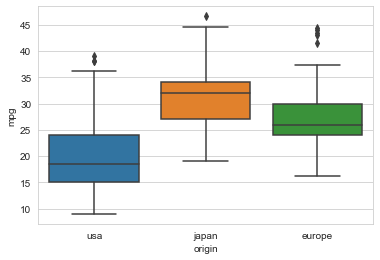

In [14]:
sns.boxplot(x=cars.origin, y=cars.mpg)


You can also write like..

<AxesSubplot:xlabel='origin', ylabel='mpg'>

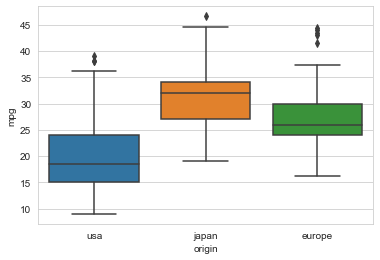

In [15]:
sns.boxplot(x='origin', y='mpg', data=cars)


### Hue
splitting the data in two categories

#### By Cylinders

<AxesSubplot:xlabel='origin', ylabel='mpg'>

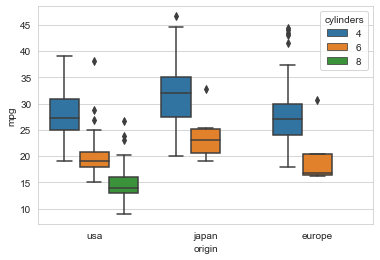

In [16]:
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=cars)


#### By Model Year
we will create our own category. If I take a look in model year category, I'll notice that most of the cars are produced en the 70s and a cuple in the 80s, the median point is the year 1976. So I could create another column, `newer_model`, and this column is just going to be a set of true or false values if that model year is greater than 1976

In [17]:
cars.model_year.describe()

count    385.000000
mean      75.961039
std        3.692058
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

In [18]:
cars['newer_model'] = cars.model_year > 76


Now we use hue='newer_model' and I'll be able to see that cars that are newer than 1976 actually had better miles per galon than the older cars

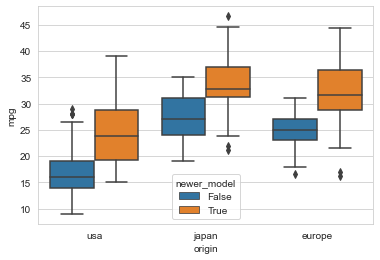

In [19]:
sns.boxplot(x='origin', y='mpg', hue='newer_model', data=cars);

### Styling Options

`order`, `hue_order`: allows us order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

<AxesSubplot:xlabel='mpg', ylabel='origin'>

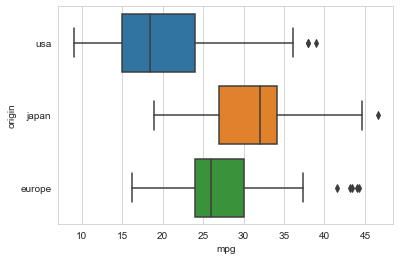

In [20]:
sns.boxplot(x='mpg', y='origin',   
            data=cars
           )

<AxesSubplot:xlabel='mpg', ylabel='origin'>

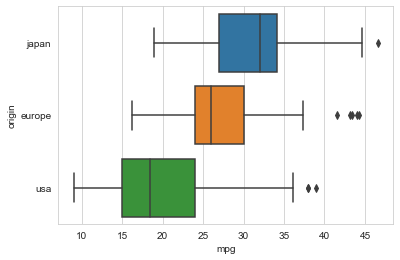

In [21]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            order=['japan', 'europe', 'usa']
           )

<AxesSubplot:xlabel='mpg', ylabel='origin'>

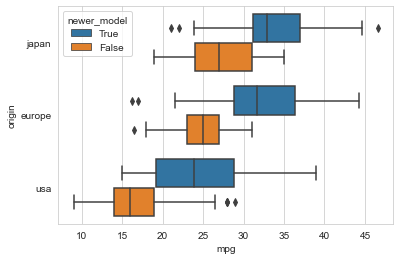

In [22]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            order=['japan', 'europe', 'usa'],
            hue_order=[True, False]
           )

`color`: Color for all of the elements, or seed for a gradient palette.

<AxesSubplot:xlabel='mpg', ylabel='origin'>

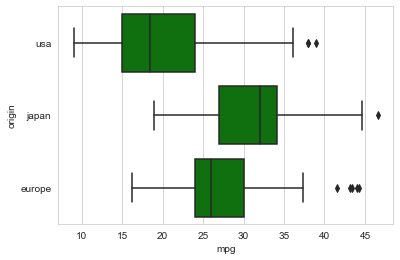

In [23]:
sns.boxplot(x='mpg', y='origin',  
            data=cars, 
            color='g'
           )

<AxesSubplot:xlabel='mpg', ylabel='origin'>

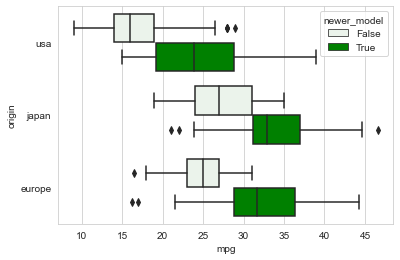

In [34]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            color='g'
           )

`width` : Width of a full element when not using hue nesting, or width of all the elements for one level of the major grouping variable.

<AxesSubplot:xlabel='mpg', ylabel='origin'>

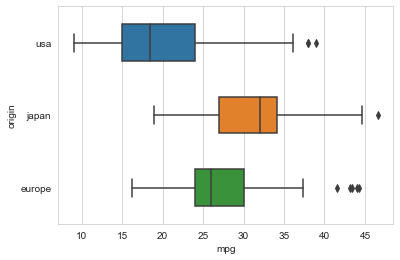

In [28]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            width=0.5
           )

`linewidth`: Width of the gray lines that frame the plot elements.

<AxesSubplot:xlabel='mpg', ylabel='origin'>

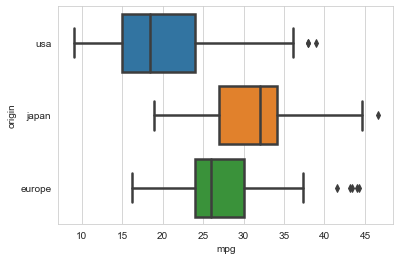

In [29]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            linewidth=2.5
           )

`whis`: Proportion of the IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.

<AxesSubplot:xlabel='mpg', ylabel='origin'>

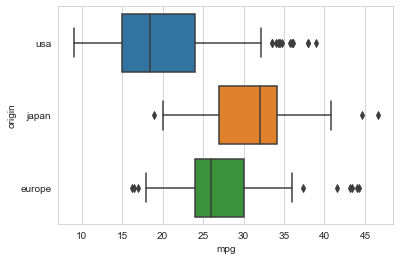

In [30]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=1
           )

<AxesSubplot:xlabel='mpg', ylabel='origin'>

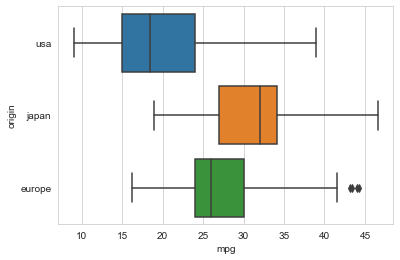

In [31]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=2
           )

`fliersize` : Size of the markers used to indicate outlier observations.

<AxesSubplot:xlabel='mpg', ylabel='origin'>

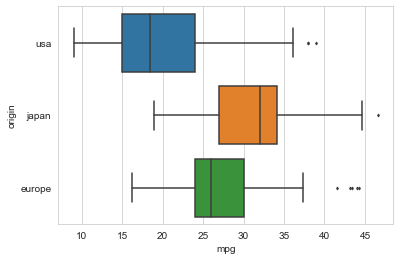

In [35]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=2
           )

<AxesSubplot:xlabel='mpg', ylabel='origin'>

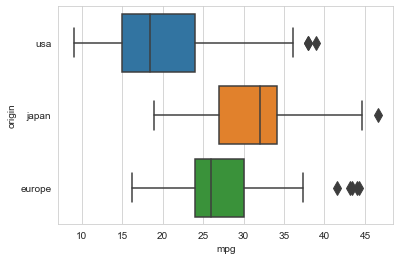

In [36]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=10
           )

## Seaborn: catplot

Figure-level interface for drawing `categorical plots` onto a FacetGrid.

It is very useful when you are not quite sure about what kind of plot you'd like to use yet.

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The `kind` parameter selects the underlying axes-level function to use: 

Categorical scatterplots:

- stripplot() (with kind=`strip`; the default)
- swarmplot() (with kind=`swarm`)

Categorical distribution plots:

- boxplot() (with kind=`box`)
- violinplot() (with kind=`violin`)
- boxenplot() (with kind=`boxen`)

Categorical estimate plots:

- pointplot() (with kind=`point`)
- barplot() (with kind=`bar`)
- countplot() (with kind=`count`)

Note that unlike when using the axes-level functions directly, data must be passed in a long-form DataFrame with variables specified by passing strings to `x`, `y`, `hue`, etc.

### Importing Data

In [7]:
#load car data and drop rows with missings
cars = sns.load_dataset('mpg')
cars.dropna(inplace=True)

#filter to 4-, 6-, 8-cylinder cars
cars = cars[cars.cylinders.isin([4, 6, 8])] 

#add old/new column
cars['type'] = ['old' if x <=76 else 'new' for x in cars.model_year]

In [8]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,old
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,old
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,old
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,old
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,old


In [9]:
cars.shape

(385, 10)

### Visuals

In [10]:
sns.set_style('white')

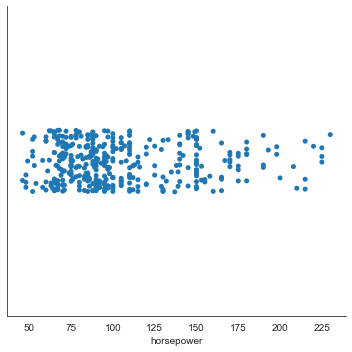

In [11]:
sns.catplot(x='horsepower', data=cars)

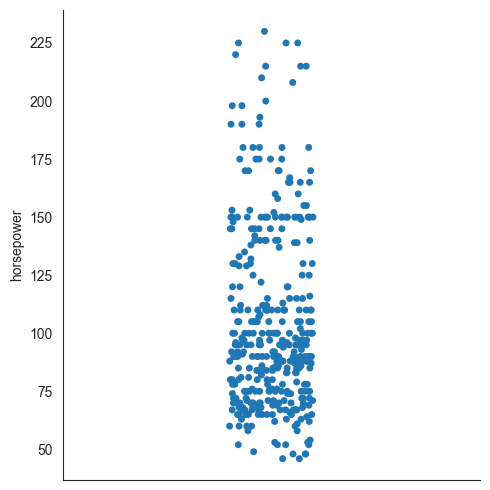

In [12]:
sns.catplot(y='horsepower', data=cars)

#### Kind

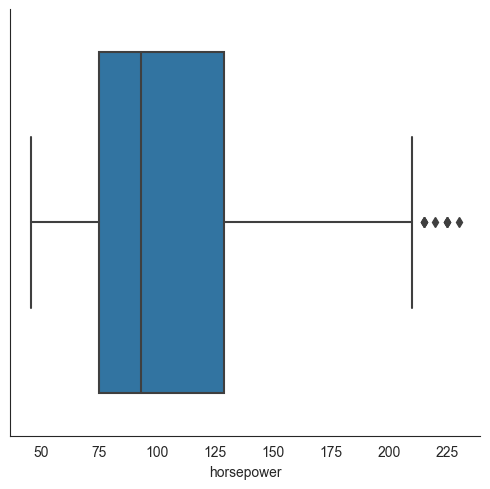

In [13]:
sns.catplot(x='horsepower', data=cars, kind='box')


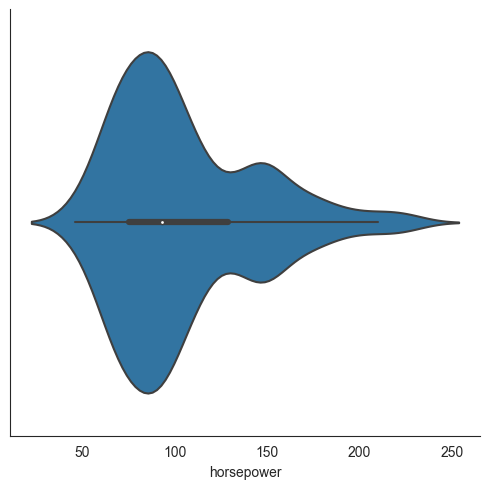

In [14]:
sns.catplot(x='horsepower', data=cars, kind='violin')

#### Hue, used for a second category

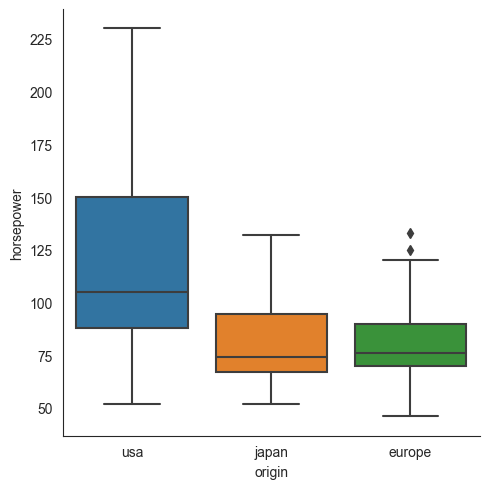

In [15]:
sns.catplot(x='origin', y='horsepower', 
            data=cars, 
            kind='box')

`hue`='cylinders' and `kind`='box'

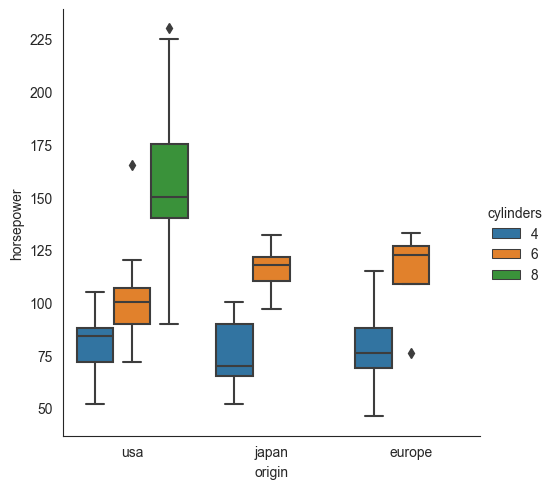

In [16]:
sns.catplot(x='origin', y='horsepower', 
            data=cars, 
            hue='cylinders',
            kind='box')

`hue`='cylinders' and `kind`='strip'

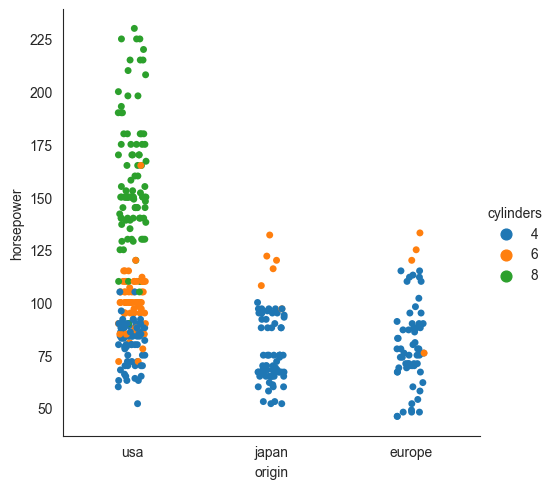

In [17]:
sns.catplot(x='origin', y='horsepower',
            data=cars, 
            hue='cylinders',
            kind='strip')

### Small Multiples (FacetGrid)

`row`, `col` are categorical variables that will determine the faceting of the grid.

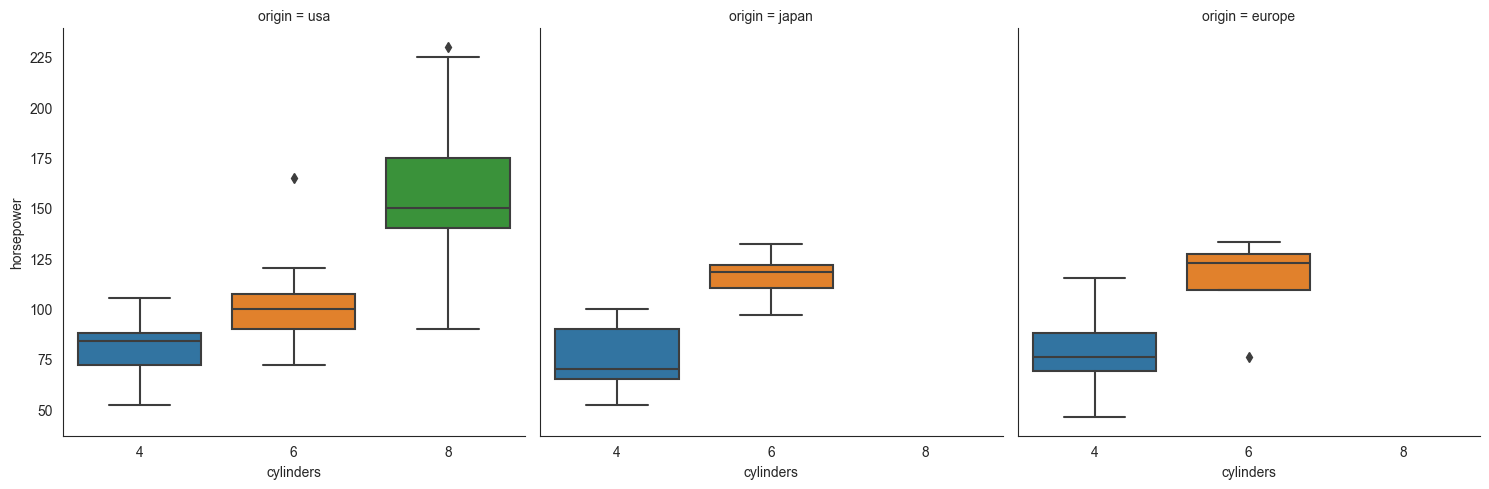

In [18]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='box',
            col='origin'
           )

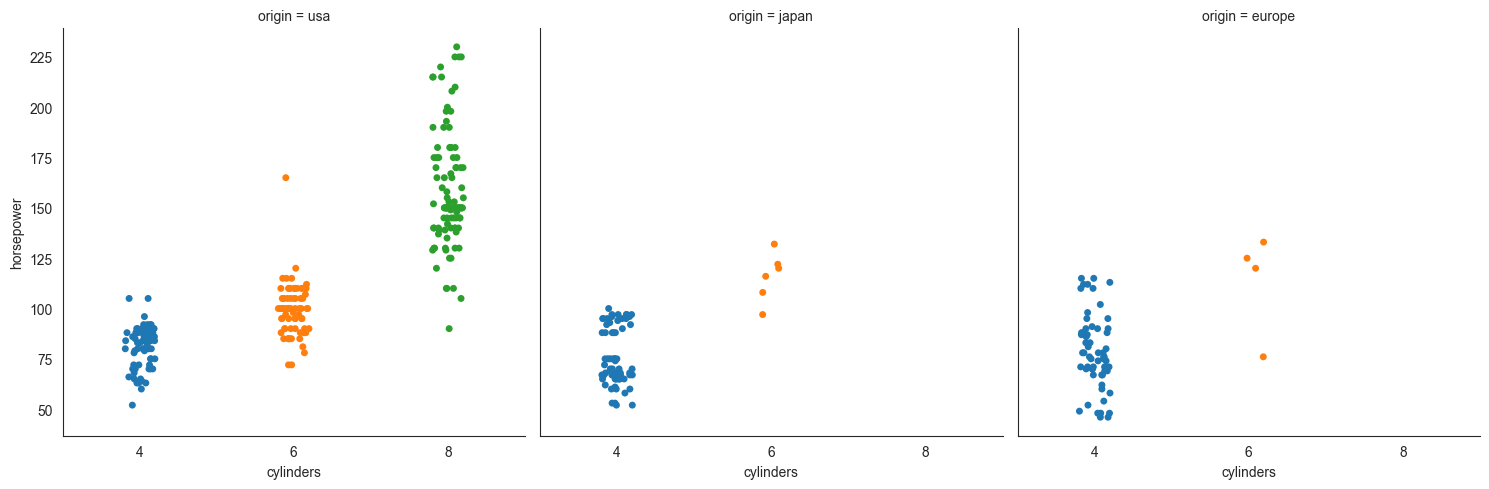

In [19]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin'
           )

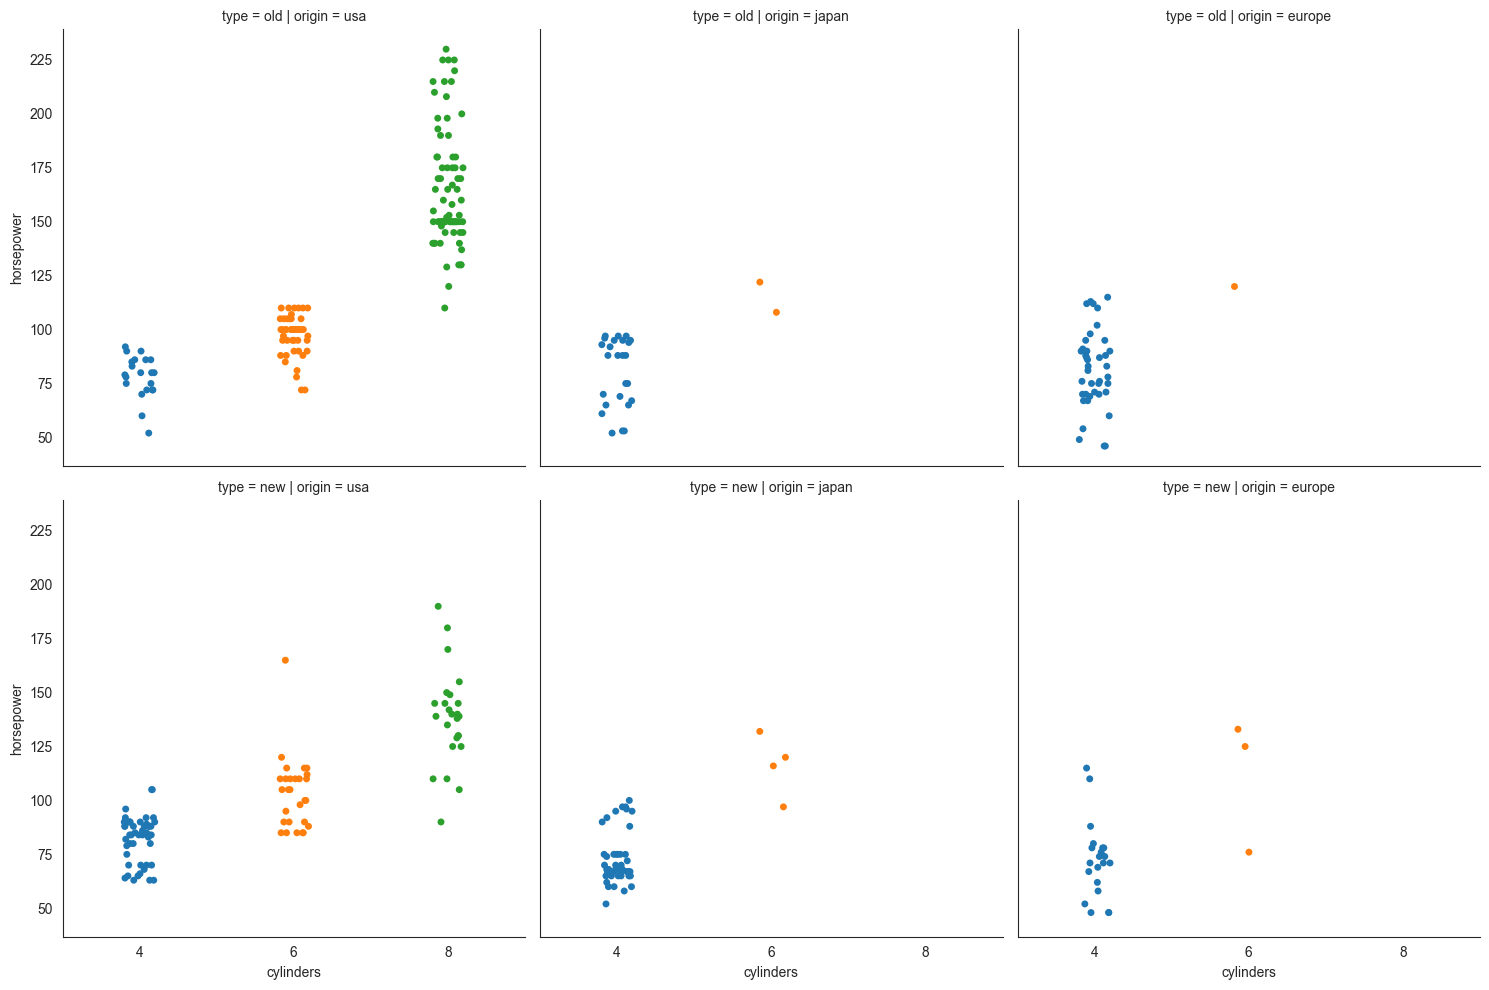

In [20]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin',
            row='type'
           )

`row_order`, `col_order`: They are used to organize the rows and/or columns of the grid at our discretion, otherwise, the orders are inferred from the data objects.

`order`, `hue_order`: They are used to draw categorical levels at our discretion, otherwise, the levels are inferred from data objects.

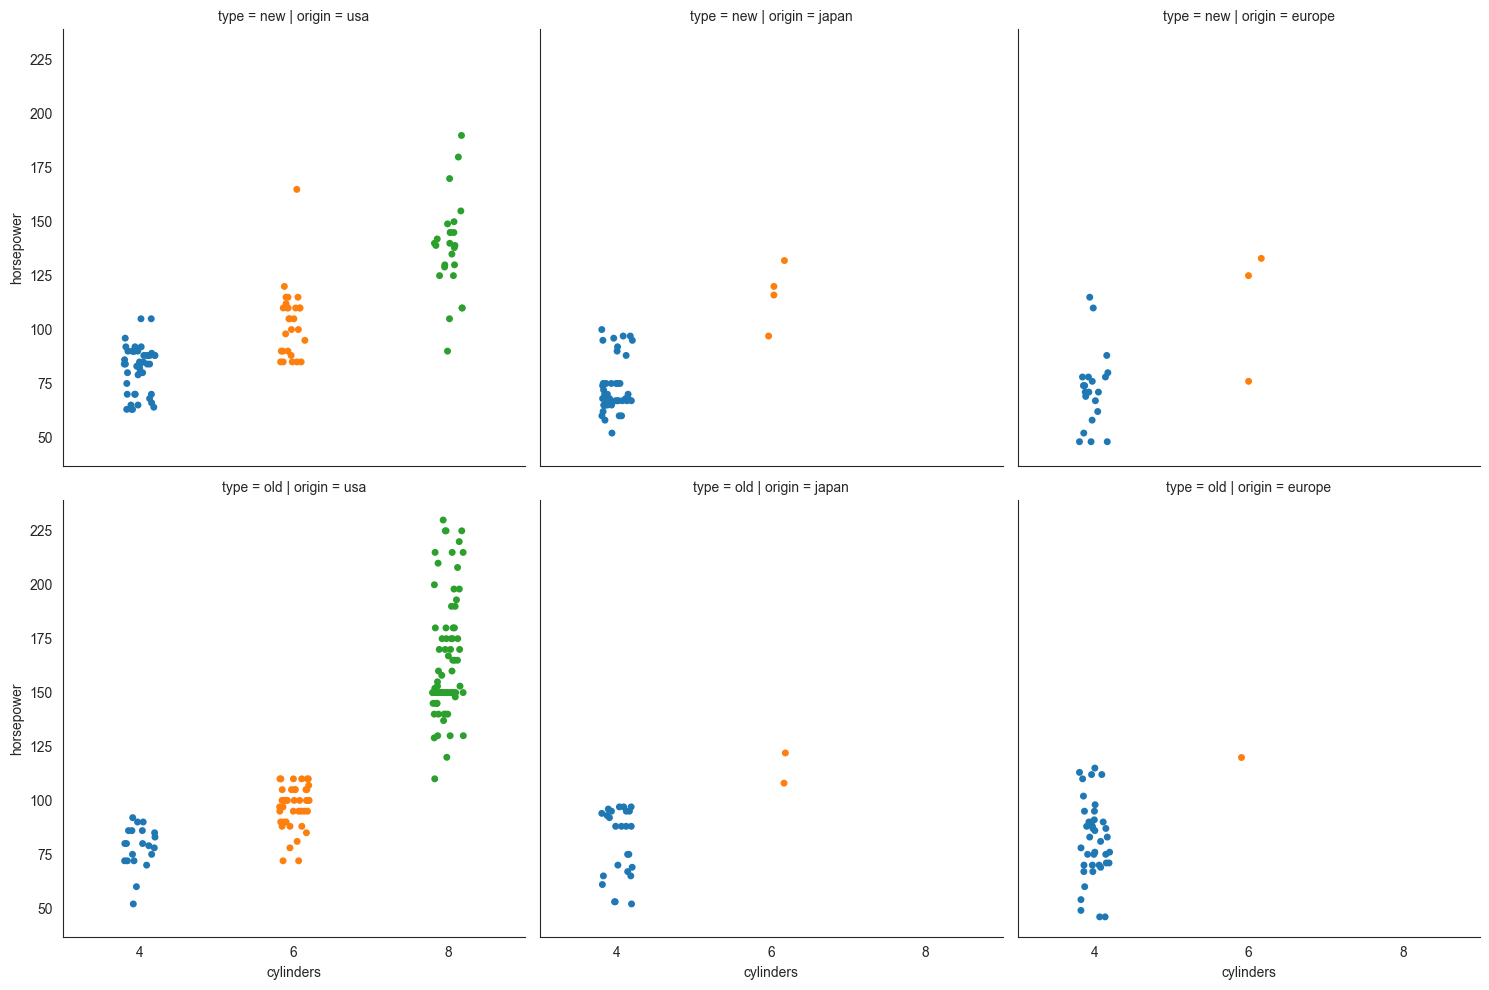

In [21]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin',
            row='type',
            row_order=['new', 'old']
           )

### Styling

In general, additional keyword arguments will be passed to the kind of plot selected.

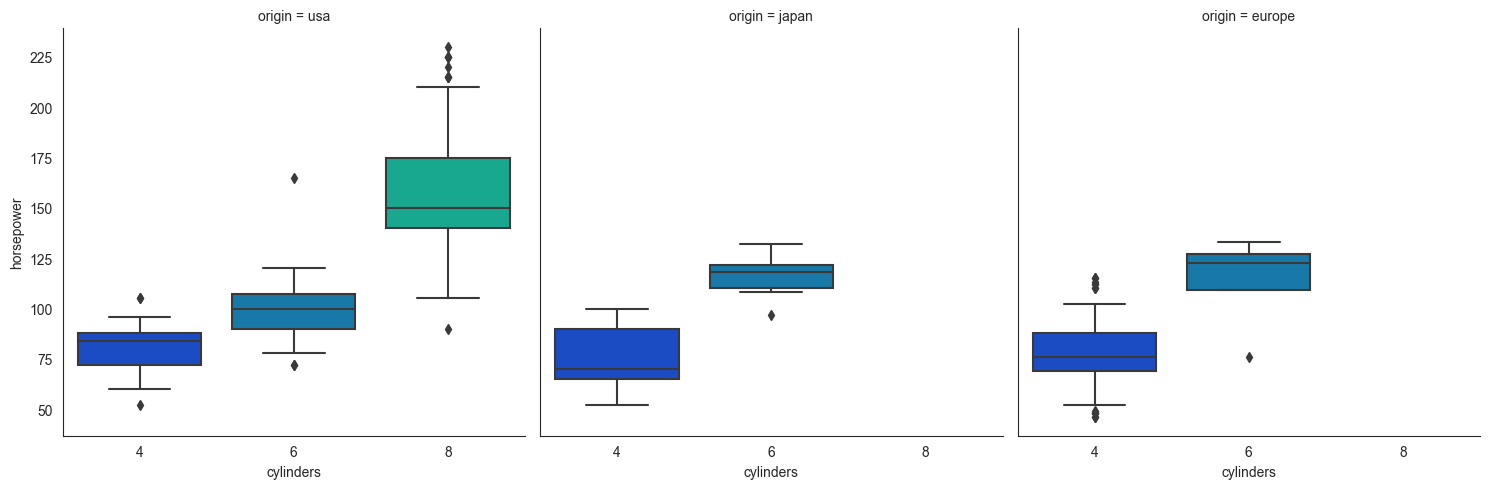

In [22]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='box',
            col='origin',
            palette='winter', 
            whis=1
           )

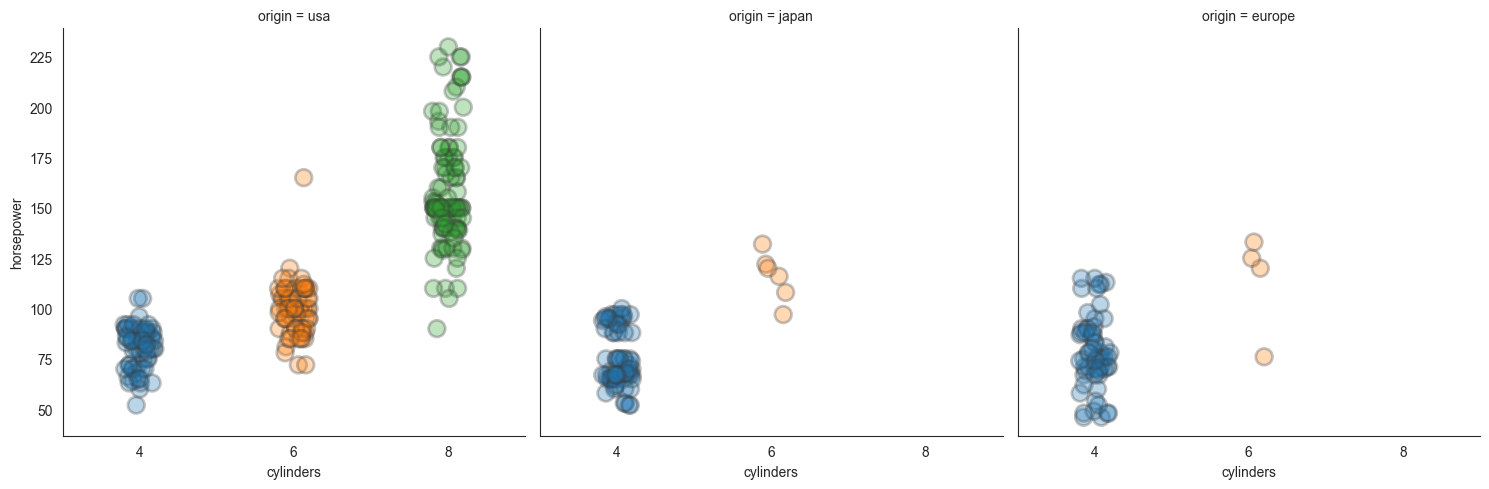

In [23]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin',
            s=12,
            alpha=0.3,
            linewidth=2
           )

#### FacetGrid Styling

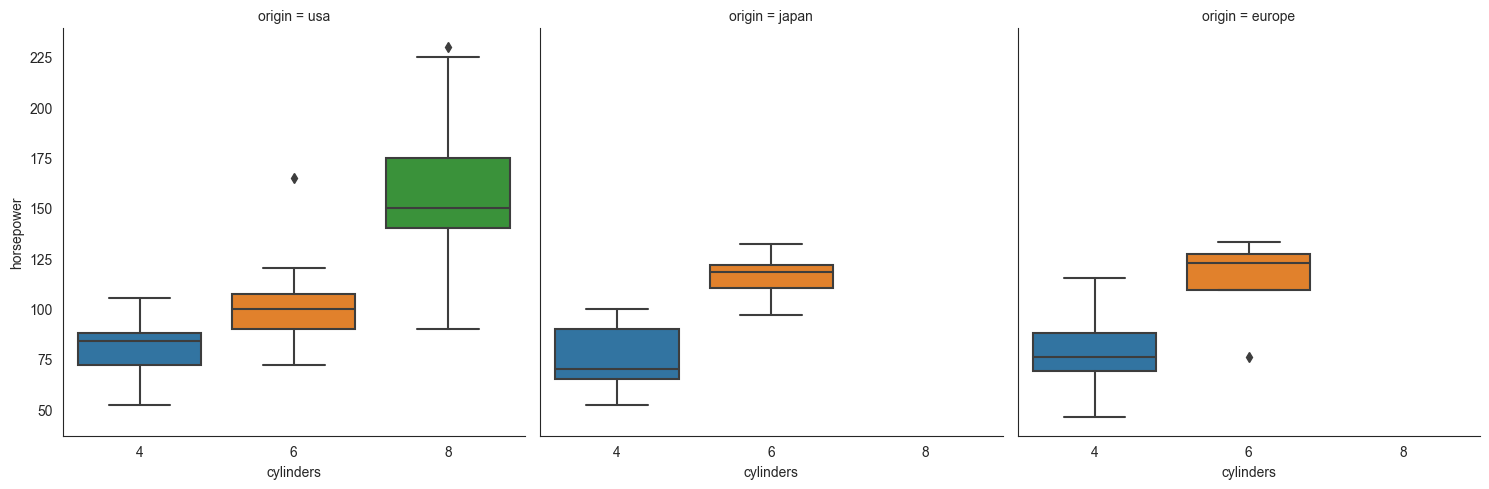

In [24]:
g = sns.catplot(x='cylinders', y='horsepower', 
                data=cars,
                col='origin',
                kind='box'
               )

In [25]:
type(g)

seaborn.axisgrid.FacetGrid

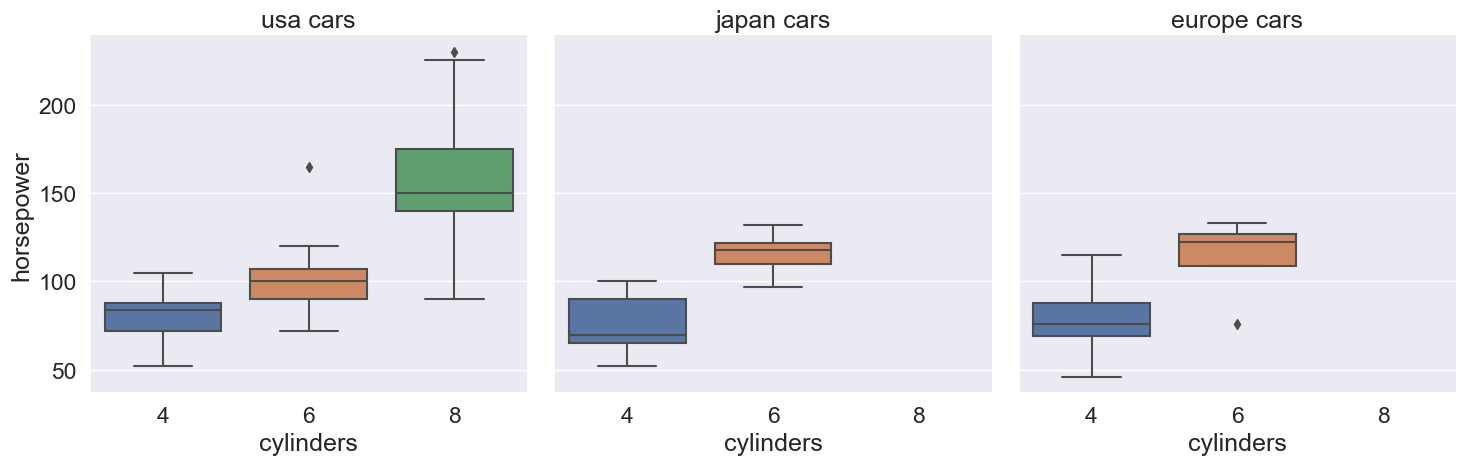

In [26]:
sns.set(style='darkgrid', font_scale=1.5)  

g = sns.catplot(x='cylinders', y='horsepower', 
                data=cars,
                col='origin',
                kind='box'
               )
g.set_titles(col_template="{col_name} cars")

## Seaborn: scatterplot

The `Scatterplot` is considered a `relational plot` so what we're are really interested in is the relationship between two different variables.

The relationship between `x` and `y` can be shown for different subsets of the data using the `hue`, `size`, and `style` parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both `hue` and `style` for the same variable) can be helpful for making graphics more accessible.

### Importing Data

In [27]:
diamonds = sns.load_dataset('diamonds')

diamonds.shape

(53940, 10)

In [28]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Splitting the data in:
- cut : 'Premium', 'Good'
- color : 'D', 'F', 'J'

In [29]:
diamonds = diamonds[
            diamonds.cut.isin(['Premium', 'Good']) & 
            diamonds.color.isin(['D', 'F', 'J'])
            ].sample(n=100, random_state=22)

diamonds.shape

(100, 10)

### Visuals

In [36]:
sns.set_style('darkgrid')

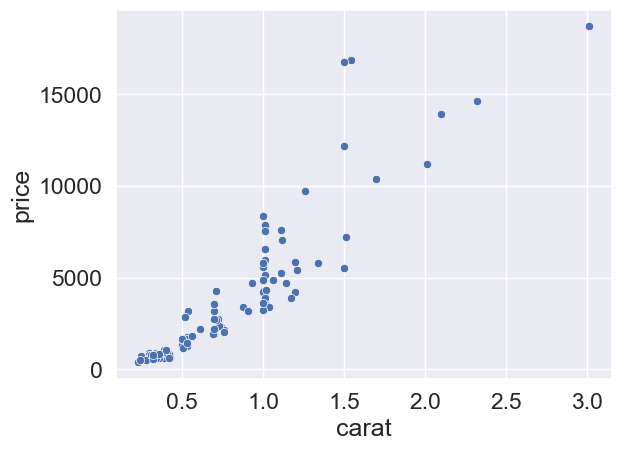

In [37]:
sns.scatterplot(x = diamonds.carat, y = diamonds.price)

<AxesSubplot:xlabel='carat', ylabel='price'>

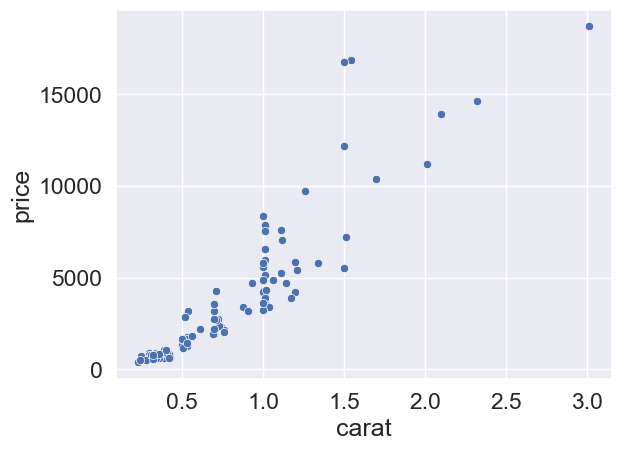

In [38]:
sns.scatterplot(x='carat', y='price', data=diamonds)

<AxesSubplot:xlabel='x', ylabel='y'>

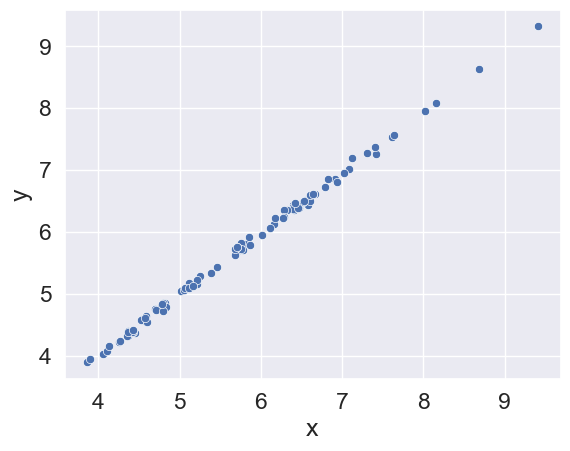

In [39]:
sns.scatterplot(x='x', y='y', data=diamonds)

### Semantic Variables
- `hue`: Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

<AxesSubplot:xlabel='carat', ylabel='price'>

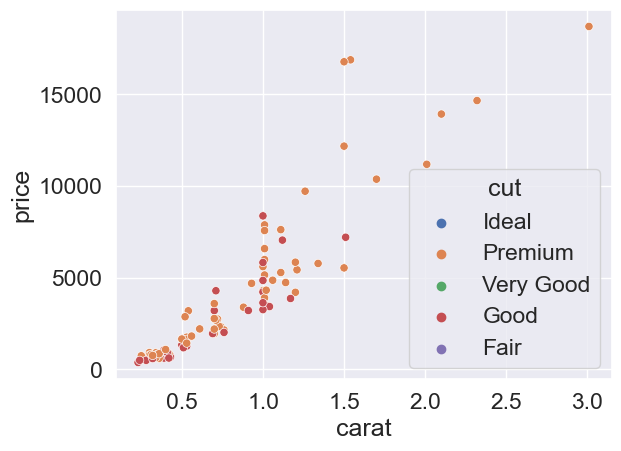

In [56]:
sns.scatterplot(x='carat', y='price', hue='cut',
                data=diamonds
               )

We can use `palette` to change the colors of the dots. Look https://coolors.co/palettes/trending

<AxesSubplot:xlabel='carat', ylabel='price'>

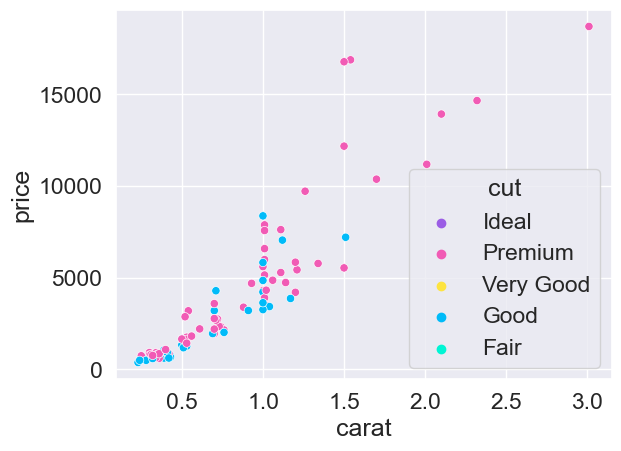

In [57]:
sns.scatterplot(x='carat', y='price', hue='cut',
                data=diamonds,
                palette=['#9b5de5', '#f15bb5', '#fee440', '#00bbf9', '#00f5d4']
               )

`hue_order` Specify the order of processing and plotting for categorical levels of the hue semantic.

<AxesSubplot:xlabel='carat', ylabel='price'>

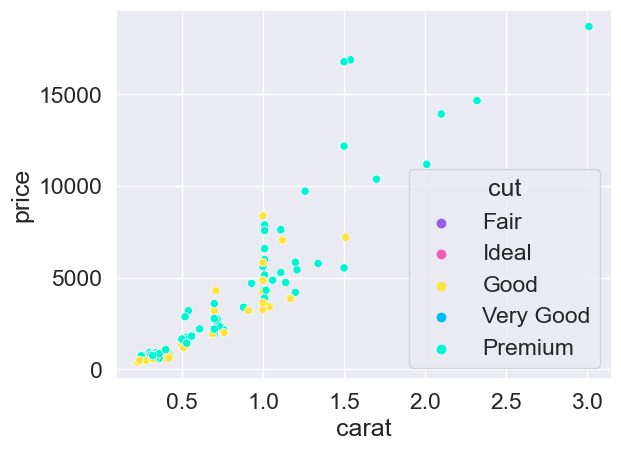

In [60]:
sns.scatterplot(x='carat', y='price', hue='cut',
                data=diamonds,
                palette=['#9b5de5', '#f15bb5', '#fee440', '#00bbf9', '#00f5d4'],
                hue_order=['Fair','Ideal','Good', 'Very Good','Premium']
               )

#### Continuous Variable

<AxesSubplot:xlabel='carat', ylabel='price'>

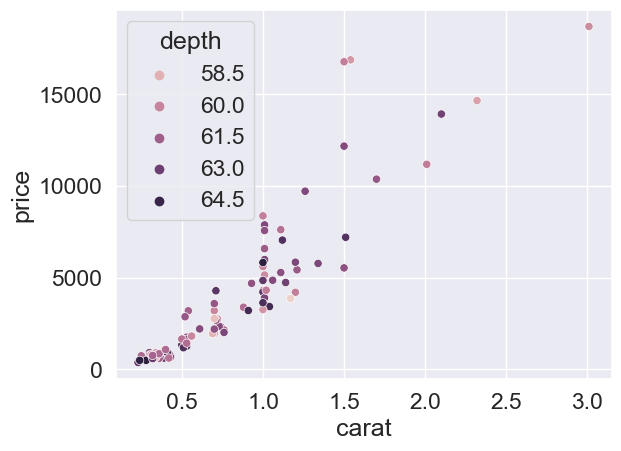

In [43]:
sns.scatterplot(x='carat', y='price', hue='depth',
                data=diamonds
               )

`style` Grouping variable that will produce points with different markers. Can have a numeric dtype but will always be treated as categorical.

`s` controls the size of the dots

<AxesSubplot:xlabel='carat', ylabel='price'>

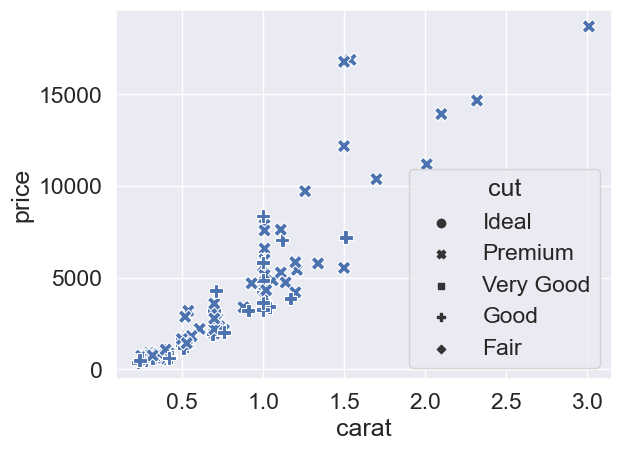

In [44]:
sns.scatterplot(x='carat', y='price', style='cut',
                data=diamonds,
                s=100
               )

`size`: Grouping variable that will produce points with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.

<AxesSubplot:xlabel='carat', ylabel='price'>

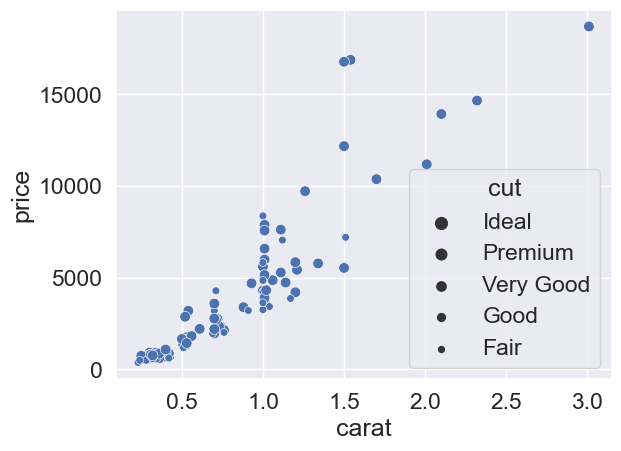

In [45]:
sns.scatterplot(x='carat', y='price', size='cut',
                data=diamonds
               )

<AxesSubplot:xlabel='carat', ylabel='price'>

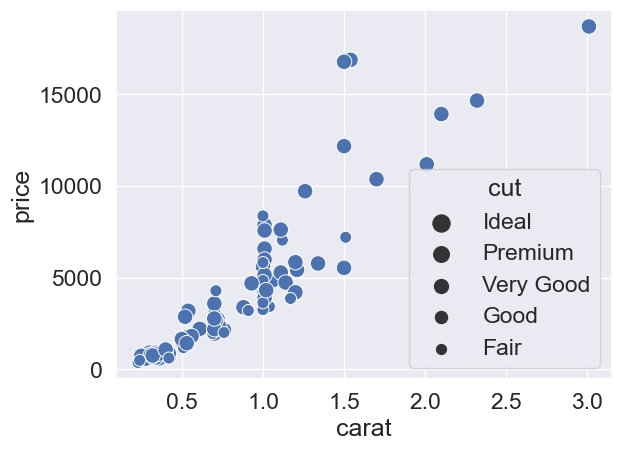

In [63]:
sns.scatterplot(x='carat', y='price', size='cut',
                data=diamonds, 
                sizes=[150, 125, 100, 75,  50]
               )

### hue + style + size

<AxesSubplot:xlabel='carat', ylabel='price'>

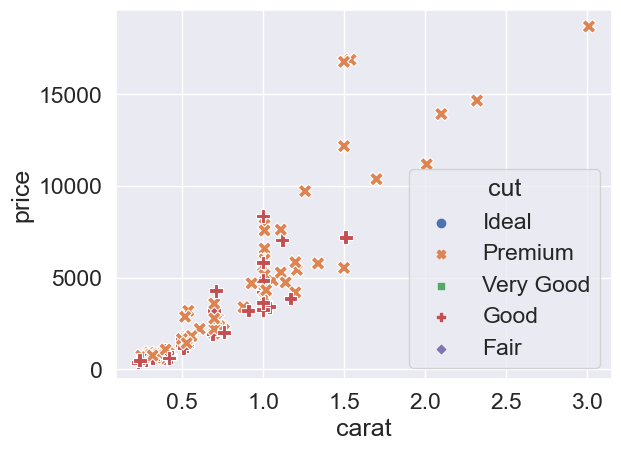

In [48]:
sns.scatterplot(x='carat', y='price', 
                hue='cut', 
                style='cut',
                data=diamonds,
                s=100
               )

<AxesSubplot:xlabel='carat', ylabel='price'>

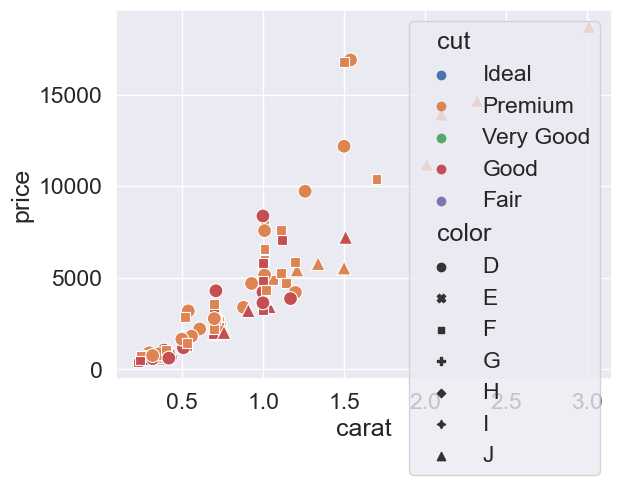

In [49]:
sns.scatterplot(x='carat', y='price', 
                hue='cut', 
                style='color',
                data=diamonds,
                s=100
               )

<AxesSubplot:xlabel='carat', ylabel='price'>

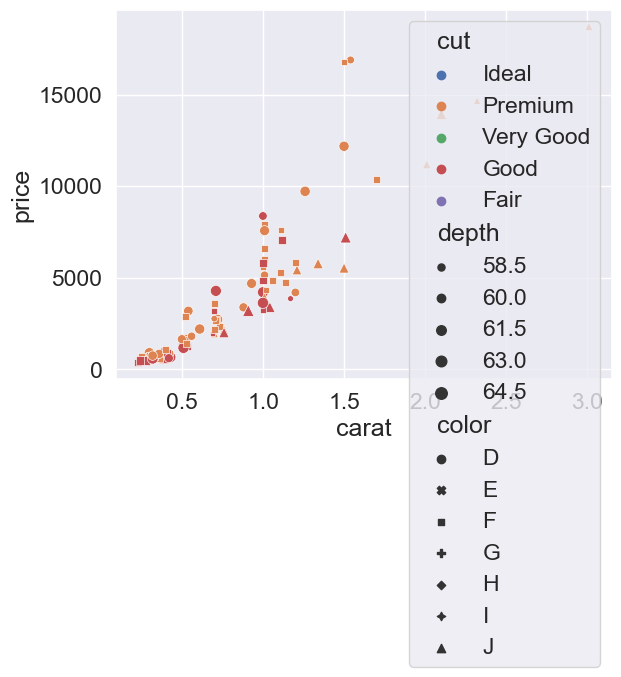

In [50]:
sns.scatterplot(x='carat', y='price', 
                hue='cut', 
                style='color',
                size='depth',
                data=diamonds)

### Additional Styling

`alpha` Proportional opacity of the points.

<AxesSubplot:xlabel='carat', ylabel='price'>

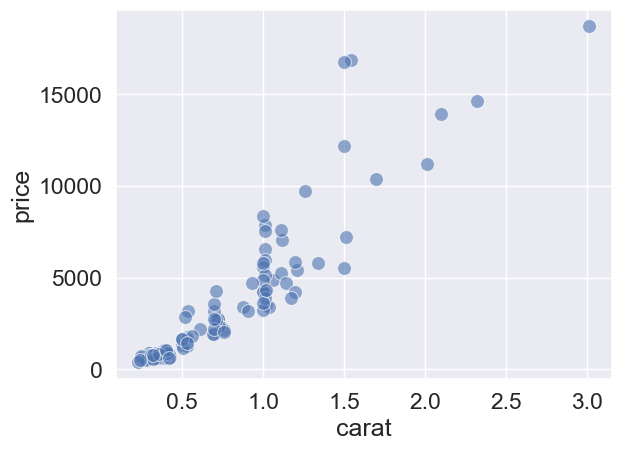

In [51]:
sns.scatterplot(x='carat', y='price', 
                data=diamonds,
                s=100,
                alpha=0.6
               )

`marker` Object determining how to draw the markers for different levels of the style variable.

<AxesSubplot:xlabel='carat', ylabel='price'>

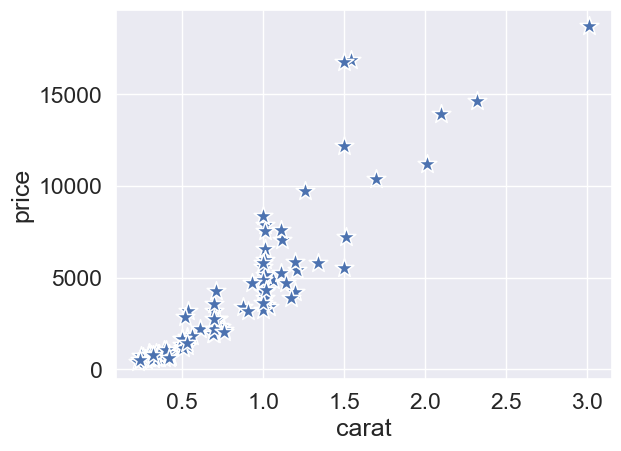

In [64]:
sns.scatterplot(x='carat', y='price', 
                data=diamonds, 
                s=200,
                marker='*'
               )

<AxesSubplot:xlabel='carat', ylabel='price'>

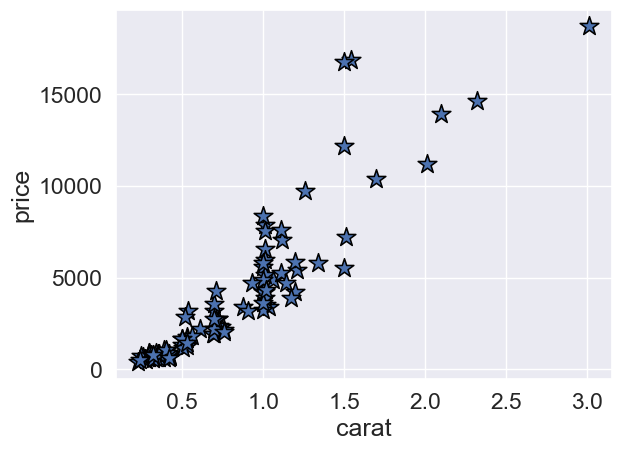

In [65]:
sns.scatterplot(x='carat', y='price', 
                data=diamonds, 
                s=200, 
                marker='*',
                edgecolor='black'
               )